ARIMA: [참고 사이트](https://h3imdallr.github.io/2017-08-19/arima/)

In [1]:
%matplotlib notebook

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
a = np.random.standard_normal((9, 4))
print ('a=\n', a.round(6))

a=
 [[-1.942554 -0.433773  0.795693 -2.246253]
 [-1.18713  -0.285072  0.413985 -0.721245]
 [ 0.204363  1.117375 -0.290247  1.022897]
 [-1.669866  1.320735 -0.395301 -0.781874]
 [-0.814554 -0.60223  -0.294534 -0.017513]
 [ 1.40731  -1.186461 -1.604373  0.818703]
 [-0.767728  0.324934 -1.062708 -0.310232]
 [-1.223485 -0.932298  0.450932  0.901866]
 [ 0.309485  1.367944  0.220717 -0.625217]]


In [4]:
fun_df = pd.DataFrame(a)
print('fun_df=\n', fun_df)

fun_df=
           0         1         2         3
0 -1.942554 -0.433773  0.795693 -2.246253
1 -1.187130 -0.285072  0.413985 -0.721245
2  0.204363  1.117375 -0.290247  1.022897
3 -1.669866  1.320735 -0.395301 -0.781874
4 -0.814554 -0.602230 -0.294534 -0.017513
5  1.407310 -1.186461 -1.604373  0.818703
6 -0.767728  0.324934 -1.062708 -0.310232
7 -1.223485 -0.932298  0.450932  0.901866
8  0.309485  1.367944  0.220717 -0.625217


In [5]:
dates = pd.date_range('2016-1-1', periods=9, freq='M')
print('dates=\n', dates)

dates=
 DatetimeIndex(['2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30'],
              dtype='datetime64[ns]', freq='M')


In [6]:
fun_df.index = dates
print('fun_df.index=\n', fun_df)

fun_df.index=
                    0         1         2         3
2016-01-31 -1.942554 -0.433773  0.795693 -2.246253
2016-02-29 -1.187130 -0.285072  0.413985 -0.721245
2016-03-31  0.204363  1.117375 -0.290247  1.022897
2016-04-30 -1.669866  1.320735 -0.395301 -0.781874
2016-05-31 -0.814554 -0.602230 -0.294534 -0.017513
2016-06-30  1.407310 -1.186461 -1.604373  0.818703
2016-07-31 -0.767728  0.324934 -1.062708 -0.310232
2016-08-31 -1.223485 -0.932298  0.450932  0.901866
2016-09-30  0.309485  1.367944  0.220717 -0.625217


In [7]:
fun_df.index

DatetimeIndex(['2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30'],
              dtype='datetime64[ns]', freq='M')

In [8]:
fun_df.columns

RangeIndex(start=0, stop=4, step=1)

In [9]:
fun_df.loc['2016-02-29']
fun_df.loc[fun_df.index[1:3]]
fun_df[1:3]


,0,1,2,3
2016-02-29,-1.187130,-0.285072,0.413985,-0.721245
2016-03-31,0.204363,1.117375,-0.290247,1.022897


In [10]:
fun_df.apply(lambda x: x**2)

,0,1,2,3
2016-01-31,3.773517,0.188159,0.633127,5.045654
2016-02-29,1.409278,0.081266,0.171383,0.520194
2016-03-31,0.041764,1.248527,0.084243,1.046318
2016-04-30,2.788454,1.744341,0.156263,0.611326
2016-05-31,0.663498,0.362681,0.086750,0.000307
2016-06-30,1.980521,1.407689,2.574013,0.670274
2016-07-31,0.589406,0.105582,1.129348,0.096244
2016-08-31,1.496915,0.869180,0.203340,0.813362
2016-09-30,0.095781,1.871270,0.048716,0.390896


In [11]:
fun_df['new'] = np.zeros(9)
fun_df

,0,1,2,3,new
2016-01-31,-1.942554,-0.433773,0.795693,-2.246253,0.0
2016-02-29,-1.187130,-0.285072,0.413985,-0.721245,0.0
2016-03-31,0.204363,1.117375,-0.290247,1.022897,0.0
2016-04-30,-1.669866,1.320735,-0.395301,-0.781874,0.0
2016-05-31,-0.814554,-0.602230,-0.294534,-0.017513,0.0
2016-06-30,1.407310,-1.186461,-1.604373,0.818703,0.0
2016-07-31,-0.767728,0.324934,-1.062708,-0.310232,0.0
2016-08-31,-1.223485,-0.932298,0.450932,0.901866,0.0
2016-09-30,0.309485,1.367944,0.220717,-0.625217,0.0


In [12]:
fun_df.columns = ['A', 'B', 'C', 'D', 'E']

#sum
fun_df.sum()
fun_df.cumsum()

#mean
fun_df.mean()

# std
fun_df.std()

# numpy universal functions
np.sqrt(fun_df)

# general stats
fun_df.describe()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in sqrt
  


,A,B,C,D,E
count,9.000000,9.000000,9.000000,9.000000,9.0
mean,-0.631573,0.076795,-0.196204,-0.217652,0.0
std,1.075243,0.989041,0.769799,1.046914,0.0
min,-1.942554,-1.186461,-1.604373,-2.246253,0.0
25%,-1.223485,-0.602230,-0.395301,-0.721245,0.0
50%,-0.814554,-0.285072,-0.290247,-0.310232,0.0
75%,0.204363,1.117375,0.413985,0.818703,0.0
max,1.407310,1.367944,0.795693,1.022897,0.0


<IPython.core.display.Javascript object>


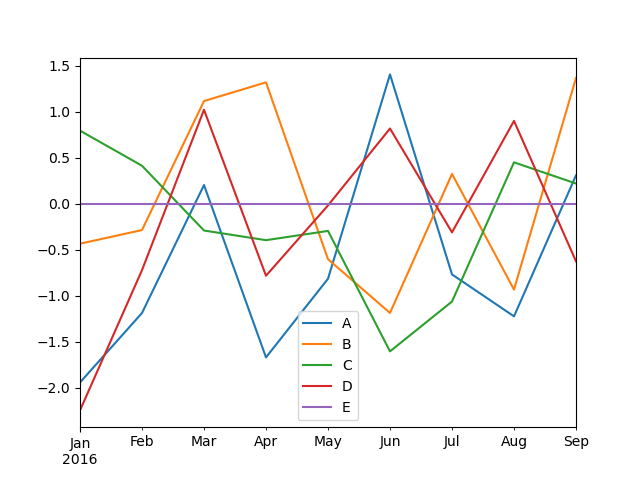

In [14]:
fun_df.plot()

In [14]:
fun_df['Quarter'] = ['Q1', 'Q1', 'Q1', 'Q2', 'Q2', 'Q2', 'Q3', 'Q3', 'Q3']
fun_df

,A,B,C,D,E,Quarter
2016-01-31,0.145409,0.954751,-0.757553,0.931644,0.0,Q1
2016-02-29,-0.270884,0.375088,0.407949,1.560910,0.0,Q1
2016-03-31,1.349615,1.959791,-0.527182,1.278145,0.0,Q1
2016-04-30,-1.171063,-0.548210,-2.119577,-1.566930,0.0,Q2
2016-05-31,-0.994523,0.145583,-0.171438,-0.425939,0.0,Q2
2016-06-30,-0.100697,-1.637276,1.415651,0.474227,0.0,Q2
2016-07-31,-1.523514,0.862377,-0.838084,0.500867,0.0,Q3
2016-08-31,0.469728,0.341704,0.739031,1.008913,0.0,Q3
2016-09-30,-0.687228,-0.180930,0.582999,-0.649619,0.0,Q3


In [15]:
groups = fun_df.groupby('Quarter')
groups

In [16]:
groups.mean()

,A,B,C,D,E
Quarter,,,,,
Q1,0.408047,1.096543,-0.292262,1.256900,0.0
Q2,-0.755428,-0.679968,-0.291788,-0.506214,0.0
Q3,-0.580338,0.341050,0.161315,0.286720,0.0


In [17]:
groups.max()

,A,B,C,D,E
Quarter,,,,,
Q1,1.349615,1.959791,0.407949,1.560910,0.0
Q2,-0.100697,0.145583,1.415651,0.474227,0.0
Q3,0.469728,0.862377,0.739031,1.008913,0.0


In [18]:
groups.size()

Quarter
Q1    3
Q2    3
Q3    3
dtype: int64

In [19]:
fun_df['Odd_Even'] = ['Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even', 'Odd']
gropus = fun_df.groupby(['Quarter', 'Odd_Even'])
fun_df
groups

In [20]:
groups.size()

Quarter
Q1    3
Q2    3
Q3    3
dtype: int64

In [21]:
groups.mean()

,A,B,C,D,E
Quarter,,,,,
Q1,0.408047,1.096543,-0.292262,1.256900,0.0
Q2,-0.755428,-0.679968,-0.291788,-0.506214,0.0
Q3,-0.580338,0.341050,0.161315,0.286720,0.0
